### 8 Random Forest 
Now that you learned how Decision Trees work, it’s time to move forward to the next level- Random Forest. In this homework, you will explore Random Forest, comparing it with the result from Decision Trees. You may use the same data set you used in the last homework

In [38]:
# import libraries for data procesing
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Let’s start with importing the Data Set

In [8]:
df = pd.read_csv('heart.csv')

In [9]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


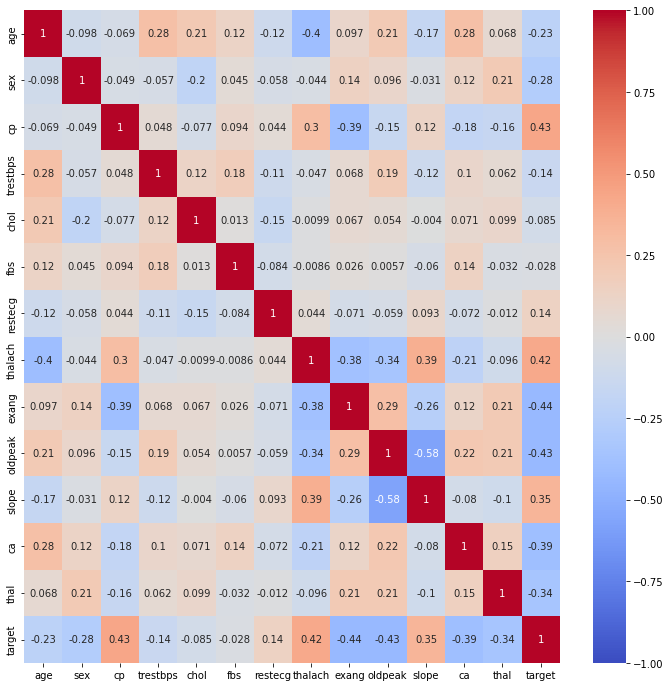

In [10]:
# Choose 2 features of the Data Set with the highest absolute correlation with the target.
plt.figure(figsize = (12, 12))

sns.heatmap(df.corr(),
            vmin = -1,
            cmap = 'coolwarm',
            annot = True);

The next thing you are going to do is to create a visualization of the decision boundaries of the algorithm, to better understand how it works and compare it with the one of the Decision Tree

1. Choose the same 2 features from the last homework.

In [11]:
# creat an subseet from all data sets
X = df[['exang', 'cp']]
# select the target column
y = df ['target']

2. Create the decission boutry graph of this features related to the target.

PS: More about decision boundary you can find here: 
    [How To Plot A Decision Boundary For Machine Learning Algorithms in Python | HackerNoon](https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07)
   

In [52]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# we make fit because we want to obiective to make scale

In [54]:
# training thre Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


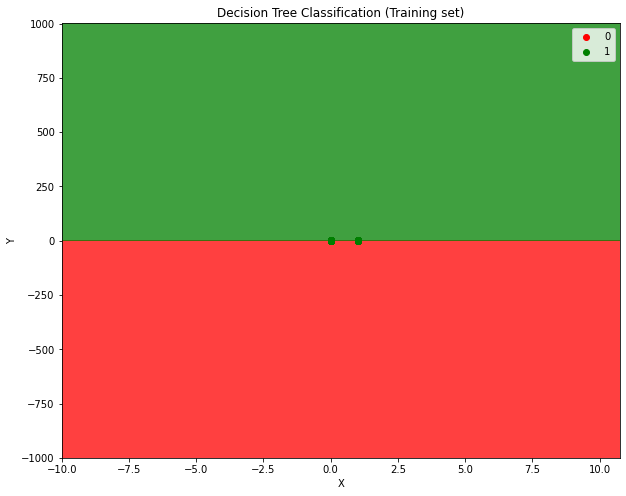

In [58]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),

                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),

             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):

    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Decision Tree Classification (Training set)')

plt.xlabel('X')

plt.ylabel('Y')

plt.legend()

plt.show()

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


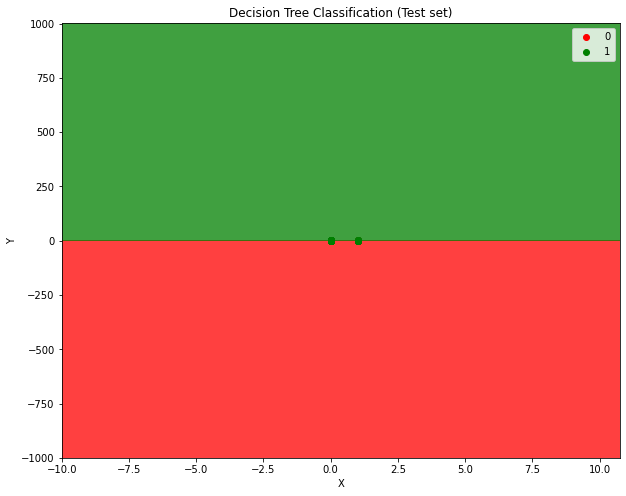

In [57]:
# Visualizate the test set
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

3. Comment the result that you got, and compare them with the one from Decission Trees homework.

- Random Forest, as Decision trees have a lot of hyperparameters, Let’s explore how they are influencing the accuracy of the model. For every hyperparameter in this list create a line plot where on the X-axis are hyperparamer values and on the Y-axis is the accuracy of the model for different hyperparameter settings:

      PS: Always set the same **random_state.** 

1. **max_depth**
2. **min_samples_split**
3. **min_samples_leaf**
4. **min_weight_fraction_leaf**
5. **max_features**
6. **max_leaf_nodes**
7. **min_impurity_decrease**

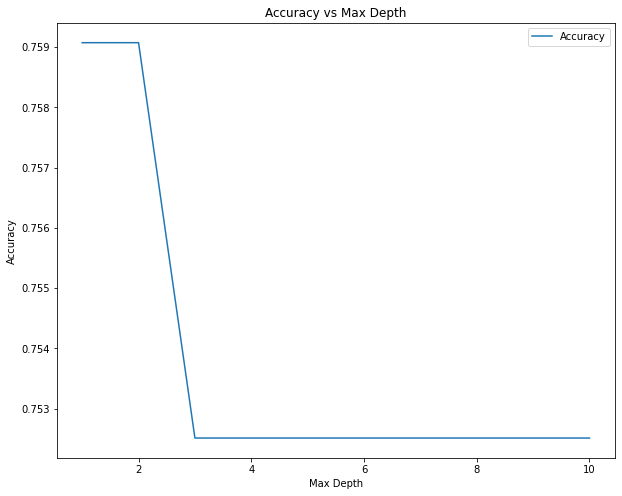

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load dataset
# X, y = sklearn.datasets.load_iris(return_X_y=True)

# Create a Random Forest classifier object
clf = RandomForestClassifier(random_state=42)

# Define the parameter range for max_depth
param_grid = {'max_depth':range(1, 11)}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Extract the best hyperparameter value and the corresponding mean accuracy
best_param = grid_search.best_params_['max_depth']
best_acc = grid_search.best_score_

# Extract the mean accuracy for each hyperparameter value
accuracies = grid_search.cv_results_['mean_test_score']

# Plot the line graph
plt.plot(range(1, 11), accuracies, label='Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.show()


C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Python310\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Python310\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._d

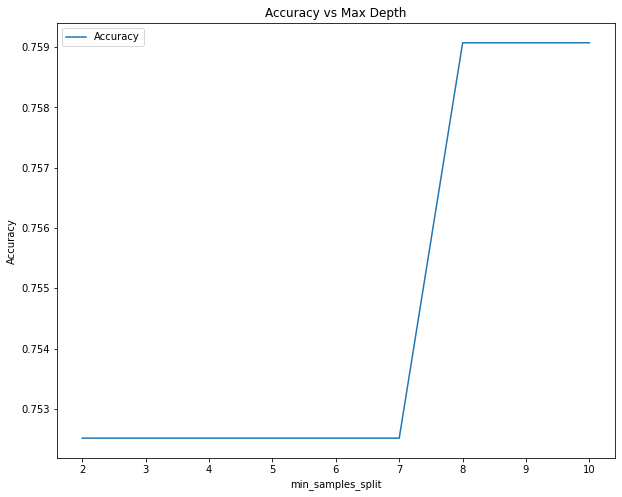

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load dataset
# X, y = sklearn.datasets.load_iris(return_X_y=True)

# Create a Random Forest classifier object
clf = RandomForestClassifier(random_state=42)

# Define the parameter range for max_depth
param_grid = {'min_samples_split':range(1, 11)}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Extract the best hyperparameter value and the corresponding mean accuracy
best_param = grid_search.best_params_['min_samples_split']
best_acc = grid_search.best_score_

# Extract the mean accuracy for each hyperparameter value
accuracies = grid_search.cv_results_['mean_test_score']

# Plot the line graph
plt.plot(range(1, 11), accuracies, label='Accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.show()


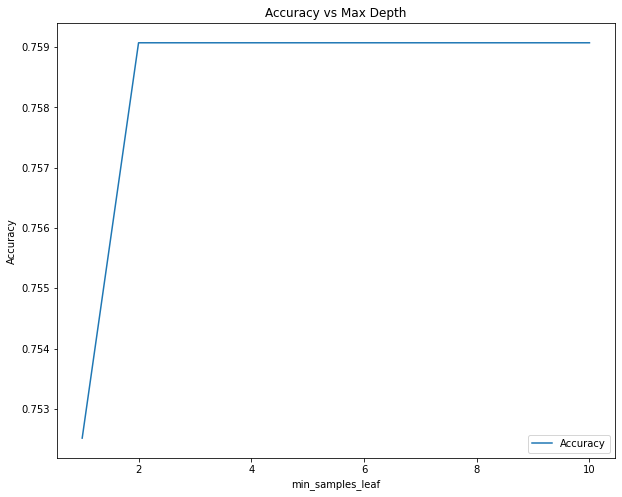

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load dataset
# X, y = sklearn.datasets.load_iris(return_X_y=True)

# Create a Random Forest classifier object
clf = RandomForestClassifier(random_state=42)

# Define the parameter range for max_depth
param_grid = {'min_samples_leaf':range(1, 11)}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Extract the best hyperparameter value and the corresponding mean accuracy
best_param = grid_search.best_params_['min_samples_leaf']
best_acc = grid_search.best_score_

# Extract the mean accuracy for each hyperparameter value
accuracies = grid_search.cv_results_['mean_test_score']

# Plot the line graph
plt.plot(range(1, 11), accuracies, label='Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.show()


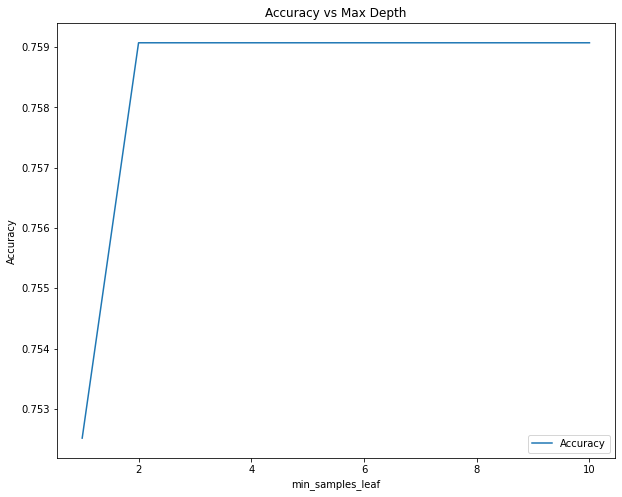

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load dataset
# X, y = sklearn.datasets.load_iris(return_X_y=True)

# Create a Random Forest classifier object
clf = RandomForestClassifier(random_state=42)

# Define the parameter range for max_depth
param_grid = {'min_samples_leaf':range(1, 11)}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Extract the best hyperparameter value and the corresponding mean accuracy
best_param = grid_search.best_params_['min_samples_leaf']
best_acc = grid_search.best_score_

# Extract the mean accuracy for each hyperparameter value
accuracies = grid_search.cv_results_['mean_test_score']

# Plot the line graph
plt.plot(range(1, 11), accuracies, label='Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.show()


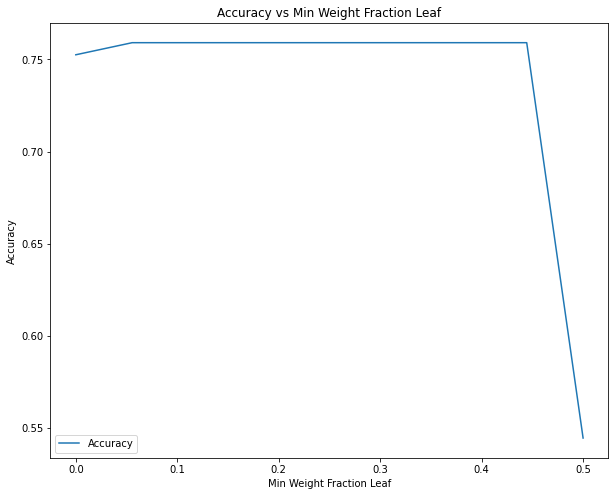

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load dataset
# X, y = sklearn.datasets.load_iris(return_X_y=True)

# Create a Random Forest classifier object
clf = RandomForestClassifier(random_state=42)

# Define the parameter range for min_weight_fraction_leaf
param_grid = {'min_weight_fraction_leaf': np.linspace(0,0.5,10)}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Extract the best hyperparameter value and the corresponding mean accuracy
best_param = grid_search.best_params_['min_weight_fraction_leaf']
best_acc = grid_search.best_score_

# Extract the mean accuracy for each hyperparameter value
accuracies = grid_search.cv_results_['mean_test_score']

# Plot the line graph
plt.plot(np.linspace(0,0.5,10), accuracies, label='Accuracy')
plt.xlabel('Min Weight Fraction Leaf')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Min Weight Fraction Leaf')
plt.legend()
plt.show()


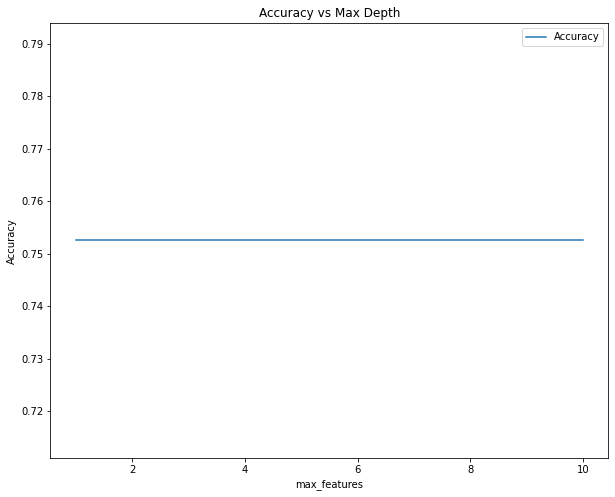

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load dataset
# X, y = sklearn.datasets.load_iris(return_X_y=True)

# Create a Random Forest classifier object
clf = RandomForestClassifier(random_state=42)

# Define the parameter range for max_depth
param_grid = {'max_features':range(1, 11)}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Extract the best hyperparameter value and the corresponding mean accuracy
best_param = grid_search.best_params_['max_features']
best_acc = grid_search.best_score_

# Extract the mean accuracy for each hyperparameter value
accuracies = grid_search.cv_results_['mean_test_score']

# Plot the line graph
plt.plot(range(1, 11), accuracies, label='Accuracy')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.show()


C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Python310\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Python310\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._d

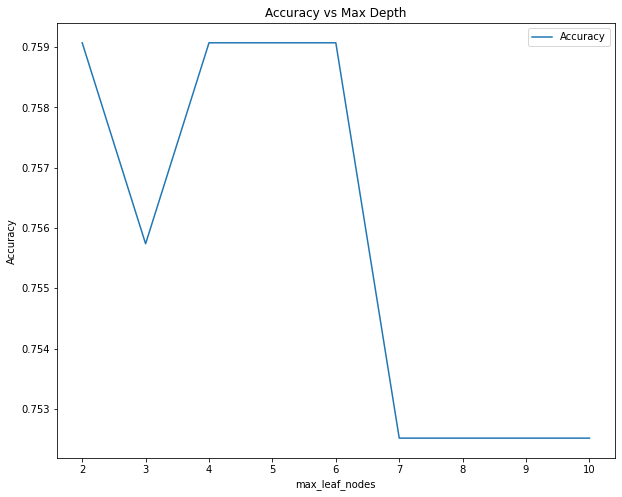

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load dataset
# X, y = sklearn.datasets.load_iris(return_X_y=True)

# Create a Random Forest classifier object
clf = RandomForestClassifier(random_state=42)

# Define the parameter range for max_depth
param_grid = {'max_leaf_nodes':range(1, 11)}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Extract the best hyperparameter value and the corresponding mean accuracy
best_param = grid_search.best_params_['max_leaf_nodes']
best_acc = grid_search.best_score_

# Extract the mean accuracy for each hyperparameter value
accuracies = grid_search.cv_results_['mean_test_score']

# Plot the line graph
plt.plot(range(1, 11), accuracies, label='Accuracy')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.show()


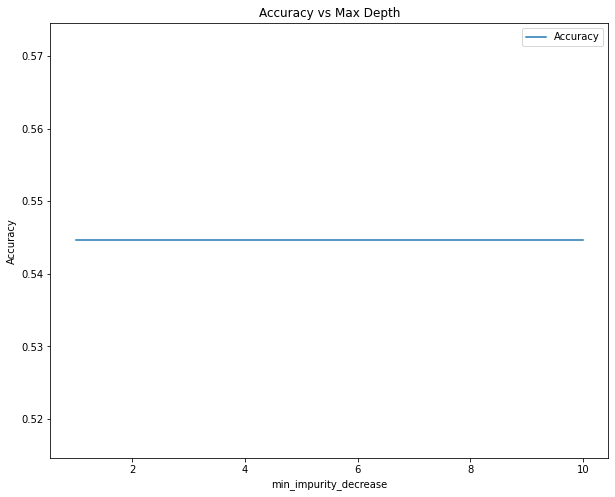

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load dataset
# X, y = sklearn.datasets.load_iris(return_X_y=True)

# Create a Random Forest classifier object
clf = RandomForestClassifier(random_state=42)

# Define the parameter range for max_depth
param_grid = {'min_impurity_decrease':range(1, 11)}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Extract the best hyperparameter value and the corresponding mean accuracy
best_param = grid_search.best_params_['min_impurity_decrease']
best_acc = grid_search.best_score_

# Extract the mean accuracy for each hyperparameter value
accuracies = grid_search.cv_results_['mean_test_score']

# Plot the line graph
plt.plot(range(1, 11), accuracies, label='Accuracy')
plt.xlabel('min_impurity_decrease')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.show()


• Comment on the impact of every hyperparameter on the model’s accuracy, especially comparing the Decision Trees results. 

• Train a model with the best set of hyperparameters

In [ ]:
# cum de cobinat hyperparametrs cu modelul?